In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.pyplot import Figure

#seaborn theme
sns.set_theme(style="whitegrid")

In [2]:
wages = pd.read_csv('http://bit.ly/BeautyDataset')
wages

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
...,...,...,...,...,...,...,...,...,...,...
1255,1.61,25,0,1,1,1,0,1,12,3
1256,1.68,4,0,1,0,1,1,1,12,2
1257,3.29,35,0,1,1,1,0,1,12,3
1258,2.31,15,0,1,1,1,1,1,10,3


In [3]:
X = wages[['exper', 'union', 'goodhlth', 'female', 'married', 'service', 'educ', 'looks']]

X.corr()

,exper,union,goodhlth,female,married,service,educ,looks
exper,1.000000,0.089792,-0.131609,-0.247209,0.255607,-0.057328,-0.186200,-0.155035
union,0.089792,1.000000,-0.022398,-0.100037,0.053629,-0.103633,-0.096022,-0.043495
goodhlth,-0.131609,-0.022398,1.000000,-0.039684,-0.013315,0.049947,0.107129,0.058558
female,-0.247209,-0.100037,-0.039684,1.000000,-0.319228,0.267961,0.009105,0.017129
married,0.255607,0.053629,-0.013315,-0.319228,1.000000,-0.075082,-0.047674,-0.064636
service,-0.057328,-0.103633,0.049947,0.267961,-0.075082,1.000000,0.301628,0.010213
educ,-0.186200,-0.096022,0.107129,0.009105,-0.047674,0.301628,1.000000,0.153842
looks,-0.155035,-0.043495,0.058558,0.017129,-0.064636,0.010213,0.153842,1.000000


<AxesSubplot:>

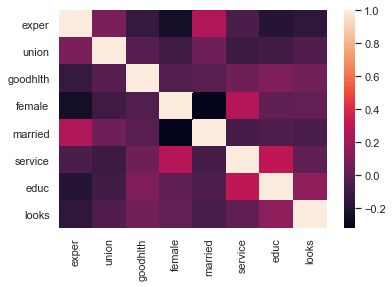

In [4]:
sns.heatmap(X.corr())

In [9]:
# The correlations are low, therefore will just do linear

X = wages[['exper', 'union', 'goodhlth', 'female', 'married', 'service', 'educ', 'looks']].values
y = wages['wage'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
linear = LinearRegression()

linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE :  4.2106320316266705


In [12]:
ridge_df = pd.DataFrame({'OG' : y_test, 'pred' : y_pred})
ridge_df

,OG,pred
0,3.91,4.828906
1,5.13,5.313061
2,20.18,9.400488
3,3.75,6.645689
4,1.76,6.239701
...,...,...
247,3.70,6.213096
248,5.73,7.689095
249,15.73,7.850597
250,4.77,5.485617
